Epoch 1/5
1875/1875 [==============================] - 35s 17ms/step - loss: 0.1497 - accuracy: 0.9537 - val_loss: 0.0447 - val_accuracy: 0.9850
Epoch 2/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0462 - accuracy: 0.9859 - val_loss: 0.0508 - val_accuracy: 0.9830
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0350 - accuracy: 0.9892 - val_loss: 0.0314 - val_accuracy: 0.9901
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.0415 - val_accuracy: 0.9878
Epoch 5/5
313/313 [==============================] - 3s 8ms/step


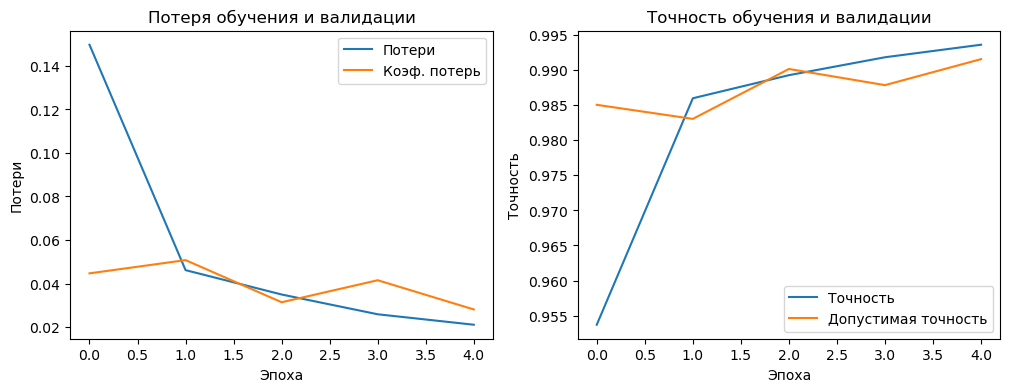

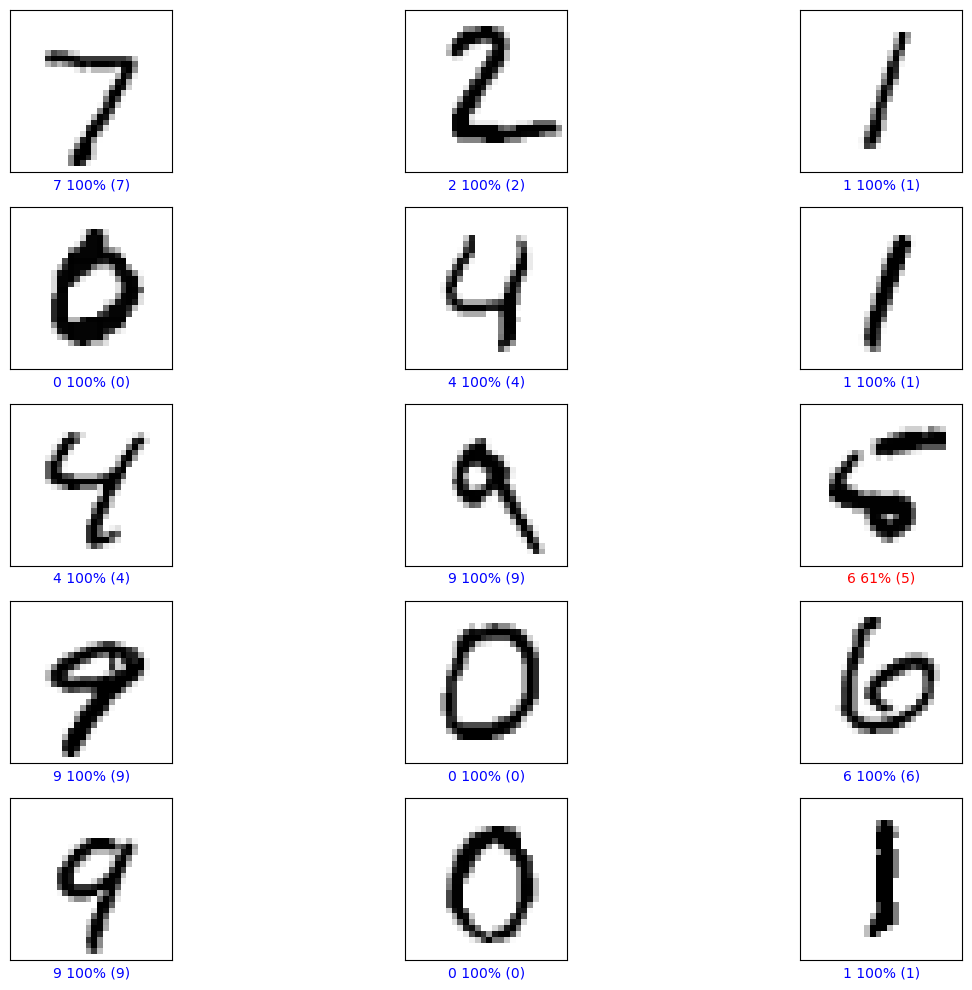

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Загрузка и предобработка набора данных MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Нормализация пикселей изображений к диапазону 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Создание модели CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Получение предсказаний на тестовых данных
predictions = model.predict(test_images)

# Функция для отображения изображения и его предсказания
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

# Визуализация процесса обучения
plt.figure(figsize=(12, 4))

# График потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Потери')
plt.plot(history.history['val_loss'], label='Коэф. потерь')
plt.title('Потеря обучения и валидации')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Точность')
plt.plot(history.history['val_accuracy'], label='Допустимая точность')
plt.title('Точность обучения и валидации')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

plt.show()

# Отображение первых X тестовых изображений и их предсказанных меток
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
plt.tight_layout()
plt.show()